<p1>To use : MLP, CNN, RNN, RNN with LSTM, SVM, and LR</p1>

In [491]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectPercentile, chi2

In [492]:
#Function to preprocess the data
def PreProc(X, Y):
    scaler = StandardScaler().fit(X)
    Columns_Scaled = scaler.transform(X)
    pca = PCA(n_components = 1000).fit(Columns_Scaled).transform(Columns_Scaled)
    Columns_Scaled = pca
    return Columns_Scaled

In [493]:
df = pd.read_csv("emotions.csv")

In [494]:
df

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.620,30.3,-356.0,15.60,26.3,1.070,0.411,-15.700,2.060,3.15,...,23.50,20.300,20.300,23.50,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.800,33.1,32.0,25.80,22.8,6.550,1.680,2.880,3.830,-4.82,...,-23.30,-21.800,-21.800,-23.30,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.900,29.4,-416.0,16.70,23.7,79.900,3.360,90.200,89.900,2.03,...,462.00,-233.000,-233.000,462.00,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.900,31.6,-143.0,19.80,24.3,-0.584,-0.284,8.820,2.300,-1.97,...,299.00,-243.000,-243.000,299.00,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.300,31.3,45.2,27.30,24.5,34.800,-5.790,3.060,41.400,5.52,...,12.00,38.100,38.100,12.00,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,32.400,32.2,32.2,30.80,23.4,1.640,-2.030,0.647,-0.121,-1.10,...,-21.70,0.218,0.218,-21.70,95.2,-19.90,47.20,47.20,-19.90,NEUTRAL
2128,16.300,31.3,-284.0,14.30,23.9,4.200,1.090,4.460,4.720,6.63,...,594.00,-324.000,-324.000,594.00,-35.5,142.00,-59.80,-59.80,142.00,POSITIVE
2129,-0.547,28.3,-259.0,15.80,26.7,9.080,6.900,12.700,2.030,4.64,...,370.00,-160.000,-160.000,370.00,408.0,-169.00,-10.50,-10.50,-169.00,NEGATIVE
2130,16.800,19.9,-288.0,8.34,26.0,2.460,1.580,-16.000,1.690,4.74,...,124.00,-27.600,-27.600,124.00,-656.0,552.00,-271.00,-271.00,552.00,NEGATIVE


In [495]:
df.head()

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.62,30.3,-356.0,15.6,26.3,1.070,0.411,-15.70,2.06,3.15,...,23.5,20.3,20.3,23.5,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.80,33.1,32.0,25.8,22.8,6.550,1.680,2.88,3.83,-4.82,...,-23.3,-21.8,-21.8,-23.3,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.90,29.4,-416.0,16.7,23.7,79.900,3.360,90.20,89.90,2.03,...,462.0,-233.0,-233.0,462.0,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.90,31.6,-143.0,19.8,24.3,-0.584,-0.284,8.82,2.30,-1.97,...,299.0,-243.0,-243.0,299.0,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.30,31.3,45.2,27.3,24.5,34.800,-5.790,3.06,41.40,5.52,...,12.0,38.1,38.1,12.0,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL


In [496]:
df['# mean_0_a'].dtype
columns = df.loc[:, '# mean_0_a' : 'fft_749_b']

In [497]:
columns

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
0,4.620,30.3,-356.0,15.60,26.3,1.070,0.411,-15.700,2.060,3.15,...,74.3,23.50,20.300,20.300,23.50,-215.0,280.00,-162.00,-162.00,280.00
1,28.800,33.1,32.0,25.80,22.8,6.550,1.680,2.880,3.830,-4.82,...,130.0,-23.30,-21.800,-21.800,-23.30,182.0,2.57,-31.60,-31.60,2.57
2,8.900,29.4,-416.0,16.70,23.7,79.900,3.360,90.200,89.900,2.03,...,-534.0,462.00,-233.000,-233.000,462.00,-267.0,281.00,-148.00,-148.00,281.00
3,14.900,31.6,-143.0,19.80,24.3,-0.584,-0.284,8.820,2.300,-1.97,...,-183.0,299.00,-243.000,-243.000,299.00,132.0,-12.40,9.53,9.53,-12.40
4,28.300,31.3,45.2,27.30,24.5,34.800,-5.790,3.060,41.400,5.52,...,114.0,12.00,38.100,38.100,12.00,119.0,-17.60,23.90,23.90,-17.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,32.400,32.2,32.2,30.80,23.4,1.640,-2.030,0.647,-0.121,-1.10,...,155.0,-21.70,0.218,0.218,-21.70,95.2,-19.90,47.20,47.20,-19.90
2128,16.300,31.3,-284.0,14.30,23.9,4.200,1.090,4.460,4.720,6.63,...,-661.0,594.00,-324.000,-324.000,594.00,-35.5,142.00,-59.80,-59.80,142.00
2129,-0.547,28.3,-259.0,15.80,26.7,9.080,6.900,12.700,2.030,4.64,...,-232.0,370.00,-160.000,-160.000,370.00,408.0,-169.00,-10.50,-10.50,-169.00
2130,16.800,19.9,-288.0,8.34,26.0,2.460,1.580,-16.000,1.690,4.74,...,-99.7,124.00,-27.600,-27.600,124.00,-656.0,552.00,-271.00,-271.00,552.00


In [498]:
#Setting Positive and Neutral as 0 and Negative as 1
df['label'] = df['label'].replace(['NEGATIVE', 'NEUTRAL', 'POSITIVE'], [0,1,2])

In [499]:
df.label

0       0
1       1
2       2
3       2
4       1
       ..
2127    1
2128    2
2129    0
2130    0
2131    1
Name: label, Length: 2132, dtype: int64

<h1>Logistic Regression</h1>

<p1>67% accuracy obtained for tests. 75% highest accuracy obtained for training data</p1>

<p1>A far-cry from the 97% being obtained from the research paper</p1>

<p5>To Do : Check what is the issue with the red boxes, look into explained variance, score and feature reduction</p5>

<p6>Essentially, a lot of data-preprocessing will need to be done</p6>

In [500]:
New_columns = PreProc(columns, df.label)

In [501]:
reg = linear_model.LogisticRegression(max_iter =7000, solver = 'saga')
X_Test, X_Train, Y_Test, Y_Train = train_test_split(New_columns, df.label, test_size = 0.8)

In [502]:
reg.fit(X_Train, Y_Train)

LogisticRegression(max_iter=7000, solver='saga')

In [503]:
reg.score(X_Test,  Y_Test)
print(reg.score(X_Test, Y_Test))

0.9624413145539906


In [504]:
reg.score(X_Train, Y_Train)

1.0

In [505]:
y_pred = reg.predict(X_Test)

In [506]:
y_pred = reg.predict(X_Test)
print(classification_report(Y_Test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       129
           1       0.99      1.00      1.00       141
           2       0.99      0.91      0.95       156

    accuracy                           0.96       426
   macro avg       0.96      0.96      0.96       426
weighted avg       0.96      0.96      0.96       426



In [507]:
len(X_Test)

426

In [508]:
len(X_Train)

1706

<Figure size 720x504 with 0 Axes>

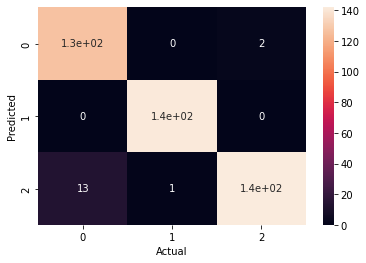

<Figure size 720x504 with 0 Axes>

In [509]:
y_true = Y_Test
y_pred = reg.predict(X_Test)
cm = confusion_matrix(y_true, y_pred)
sn.heatmap(cm, annot = True)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.figure(figsize=(10,7))

<h1>Conclusion</h1>
<p1>Without Pre-prcocessing data, accuracy of apporx 70% was being obtained, with most solvers averaging around 66%</p1>
<br></br>
<p1>Using Principal Component Analysis to limit the number of columns to 1000, accuracy increased to approx 72%, but not significant</p1>
<br></br>
<p1>Using Principal Component analysis with conjunction with Standard Scaling Normalization increased accuracy greatly, upto 90%(still far from the accuracy claimed in the research)</p1>
<br></br>
<p1>Without PCA : 94%</p1>
<br></br>
<p1>When limited to 2000 columns : ~95% - 96%</p1>
<br></br>
<p1>When limited to 1500 columns : 95%</p1>
<br></br>
<p1>When limited to 1000 columns : 96%</p1>
<br></br>
<p1>When limited to 500 columns : 96%</p1>
<br></br>
<p1>When limited to 100 columns : 91%</p1>
<br></br>
<p1>When limited to 10 columns : 68%</p1>

<h1> Using SVM </h1>